In [4]:
def fprint(s):
    print("{:.2}".format(s))

### Tutorial 9

Modified _E.coli_ can be used to produce succinic acid without forming any by-products. The modified metabolism is given below.

<img src="homosucc.png" width="550" />

Note that the pathway to acetic acid is not present since the gene coding for the required enzyme was removed. Also note that the PEP carboxykinase enzyme (found natively in _A. succinogenes_ from tut 4) was added to the  organism by inserting the relevant gene.

The flux model is supplied, but make sure you can set it up yourself (this might take some time so you can do it after performing the integration part of the problem). Like before the flux model is supplied in a hidden format. Ten equations are supplied in [Tut9eq.xlsx](https://github.com/willienicol/Biochemical-engineering-notes/blob/master/Tutorials/Tut9eq.xlsx), with equation 10 representing the energy balance. All equations are equal to zero except the energy balance that is equal to $\theta$. All rates correspond to the flux numbers on the map with $r_{11}$ representing $CO_2$

It is easy to transfer the 12x10 matrix into Python and add specification equations. You can use the code below. Ensure that the Excel file is in the same directory as the Jupyter notebook file.

The code below generates the matrix for anaerobic conditions where $r_O$ is specified as zero, while $r_X=\mu$ is specified as basis.


In [20]:
import numpy, pandas
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [21]:
M1 = numpy.matrix(pandas.read_excel('Tut9eq.xlsx'))
M = numpy.vstack([M1,[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0]])

mu_max, theta_max, C_p_mu, monod = 0.3, 0.08, 0.75, 4e-4

def ratefun(C):  #Cs, Cx, Cp, Cco2
    mu = mu_max * C[0] / (monod + C[0]) * (1 - C[2]/C_p_mu)
    theta = theta_max * C[0]/(monod + C[0])
    
    if(mu<0):
        mu=0
    
    S=numpy.array([0,0,0,0,0,0,0,0,0,theta,mu,0]).T
    X=numpy.linalg.solve(M, S)
    return( [-X[0], X[1], X[9], X[11], mu, theta] )

In [22]:
def fermfun(C, t):
    r=ratefun(C)
    return [ri*float(C[1]) for ri in r[:4]]

In [23]:
C_0=[100/30, 0.002, 0, 0]

ts=numpy.linspace(0, 200, 10000)
C=odeint(fermfun, C_0, ts)
r=numpy.array([ratefun(Ci) for Ci in C])

The physiological parameters can be taken as:

|$\alpha \qquad \qquad$|$\gamma \qquad \qquad $|$\mu_{max} \qquad$|$\theta_{max}\qquad$
|----|-|-|-|-
|$\frac{\text{cmol $CO_2$}}{\text{cmol X}}$|$\frac{\text{mol ATP}}{\text{cmol X}}$|$\frac{1}{\text{h}}$|$\frac{\text{mol ATP}}{\text{cmol X}\cdot \text{h}}$
|0.1|2.2|0.3|0.08

The inhibition functions are given by:

$$\mu(C_S,C_P)= \mu_{max} \left[\frac{Cs}{K_m^{\mu}+Cs} \right]   \left[ 1-\frac{C_P}{{C_P^{*}}^{\mu}} \right] $$

$$\theta(C_S,C_P)= \theta_{max} \left[\frac{Cs}{K_m^{\theta}+Cs} \right]   $$

$C_{P^{*}}^{\mu}$ refers to the terminal succinic acid concentration of $0.75$ $\frac{\text{cmol}}{\text{L}}$. All Monod constants can be taken as $4 \times 10^{-4}$ $\frac{\text{cmol}}{\text{L}}$.

The following initial conditions. $C_X^0=0.002 \frac{cmol}{L}$ and $C_S^0=\frac{100}{30} \frac{cmol}{L}$

a) How long will the fermentation take?

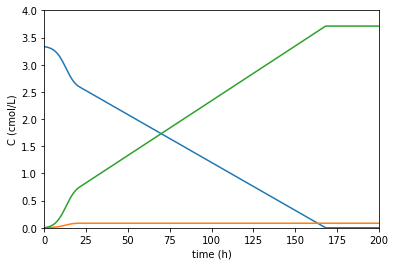

1.7e+02


In [24]:
for i in range(3):
    plt.plot(ts, C[:,i])

plt.xlabel("time (h)")
plt.ylabel("C (cmol/L)")
plt.axis([0,200,0,4])
plt.show()
fprint(numpy.interp(0, C[:,0][::-1], ts[::-1]) )

b) Determine the instantaneous **volumetric** rate of succinic acid production and $Y_{SSA}$ at 10 hours. [$1.5 \frac{g}{L\cdot h}$, $0.97 \frac{g}{g}$]

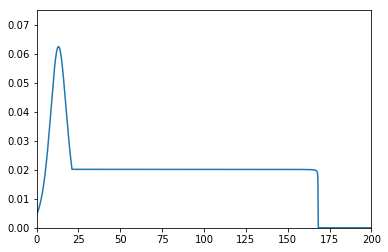

1.5
0.97


In [6]:
r_vsa=r[:,2]*C[:,1]
plt.plot(ts, r_vsa)
plt.axis([0,200,0,0.075])
plt.show()
fprint(numpy.interp(10, ts, r_vsa) * 29.5 ) 
fprint(numpy.interp(10, ts, r[:,2]) / -numpy.interp(10, ts, r[:,0]) * 29.5 / 30)

c) Determine the instantaneous **volumetric** rate of succinic acid production and $Y_{SSA}$ at 60 hours and comment. [$0.665 \frac{g}{L \cdot h}$ and $1.09 \frac{g}{g}$]

In [7]:
fprint(numpy.interp(60, ts, r[:,2]*C[:,1]) * 29.5 ) 
fprint(numpy.interp(60, ts, r[:,2]) / -numpy.interp(60, ts, r[:,0]) * 29.5 / 30)

0.59
1.1


d) At what time is the maximum value of $r_{SA}^V$ obtained? [$13 h$]

In [8]:
fprint( ts[ numpy.where( r_vsa == max(r_vsa) )[0][0] ] )

1.3e+01


e) What is the APY and productivity of the fermentation above?

In [9]:
fprint( C[:,2][-1] / C_0[0] * 29.5 / 30 )
fprint( C[:,2][-1] / numpy.interp(0, C[:,0][::-1], ts[::-1]) *29.5)

1.1
0.65


f) What is the volumetric rate of $CO_2$ consumption at 60 hours? [$2.5 \frac{mmol}{L\cdot h} $]  

In [10]:
fprint( -numpy.interp(60, ts, r[:,3]*C[:,1]) *1000)

2.5


g) How will a higher product titre ($C_{SA}^{final}$) be achieved? Will the APY and productivity be higher or lower for this fermentation.

h) It is also possible to operate the fermentation under aerobic conditions. Zero succinic acid will form when sufficient oxygen is available (assume this to be the case). Operate the fermenter aerobically for 15 hours by sparging with oxygen and then switch to sparging with $CO_2$. Note that the specifications in the response matrix will alter between aerobic and anaerobic conditions. Integrate the aerobic and anaerobic sections separately, but plot together on a single graph. Determine the APY and productivity of the total fermentation. Compare to the answer in (e) and explain to yourself. What happened to $C_{SA}^{final}$ when comparing to (e)? Also play with increasing the aerobic fermentation time. Take enough time in understanding the concentration profiles and don't just focus on getting the answers. 


[$1.64 \frac{g}{L \cdot h}$ and $0.99 \frac{g}{g}$]

In [17]:
M1 = numpy.matrix(pandas.read_excel('Tut9eq.xlsx'))
Mae = numpy.vstack([M1,[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0]])

def ratefun_ae(C):  #Cs, Cx, Cp, Cco2
    mu = mu_max * C[0] / (monod + C[0]) * (1 - C[2]/C_p_mu)
    theta = theta_max * C[0]/(monod + C[0])
    
    if(mu<0):
        mu=0
    
    S=numpy.array([0,0,0,0,0,0,0,0,0,theta,mu,0]).T
    X=numpy.linalg.solve(Mae, S)
    return( [-X[0], X[1], X[9], X[11], X[4], X[6], X[10]] )

In [18]:
def fermfun_ae(C, t):
    r=ratefun_ae(C)
    return [ri*float(C[1]) for ri in r[:4]]

750


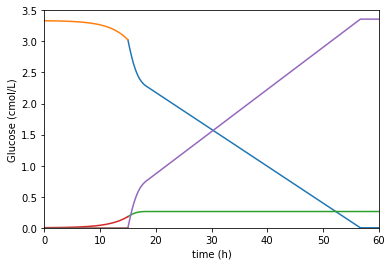

In [19]:
C_0_ae=[100/30, 0.002, 0, 0]

time=15

ts_ae=numpy.linspace(0, 200, 10000)
Cae=odeint(fermfun_ae, C_0_ae, ts_ae)
rae=numpy.array([ratefun_ae(Ci) for Ci in Cae])
C_0_an=Cae[numpy.where(abs(ts_ae-time)<1e-2)[0][0]] #init conditions after aerobic

ts_an=numpy.linspace(time, 200, 10000)
Can=odeint(fermfun, C_0_an, ts)
ran=numpy.array([ratefun(Ci) for Ci in Can])

t_ae = numpy.where(abs(ts_ae-time)<1e-2)[0][0]
print(t_ae)

plt.figure(2)

for compound in range(3):
    plt.plot(ts_an, Can[:,compound])
    plt.plot(ts_ae[:t_ae], Cae[:,compound][:t_ae])
plt.xlabel("time (h)")
plt.ylabel("Glucose (cmol/L)")
plt.axis([0,60,0,3.5])
plt.show()

i) It should be clear that $CO_2$ is consumed when operating under anaerobic conditions. What will happen when the $CO_2$ supply in this phase is shut off? For the aerobic phase oxygen sparging is required, but is it in order to shut off the $CO_2$ supply? Determine the $CO_2$ consumption/production at the start of the aerobic phase in (h). Also investigate the internal flux distribution in the aerobic phase by having a close look at fluxes $r_4$ and $r_5$. What is the difference between the simplified respiration model in [section 4.3](https://nbviewer.jupyter.org/github/willienicol/Biochemical-engineering-notes/blob/master/4%20Stoichiometry%20that%20includes%20internal%20reactions/TCA%20cycle%20and%20oxidative%20phosphorylation.ipynb) and the respiration in this tutorial?

The microbe will die.
Nope CO2 is produced.


In [14]:
print("Determine the CO2 consumption/production at the start of the aerobic phase in (h)")
print( numpy.interp(time, ts, rae[:,3]), numpy.interp(time, ts, ran[:,3]) )
#production during aerobic, consumption during anaerobic

Determine the CO2 consumption/production at the start of the aerobic phase in (h)
0.219516429298218 -0.029992731405172772


Rate 4 is zero and rate 5 is negative. Thus a cycle forms r3->r7->r8->(-r5)->r6->r3
Difference being that SA, Fum and Mal are formed as opposed to alpha-Ket and Su-CoA

j) What is the difference between $-r_{S}$ at the end of the aerobic phase and the start of the anaerobic phase? Why the difference? [$\frac {-r_S^{anaer}}{-r_S^{aer}} = 4.4$}

4.4


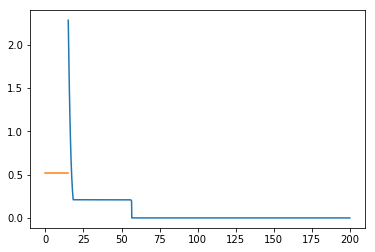

In [15]:
time_15 = numpy.where(abs(ts-15)<1e-2)[0][0]
fprint( ran[:,0][0] / rae[:,0][time_15])

plt.plot(ts_an, -ran[:,0])
plt.plot(ts_ae[:t_ae], -rae[:,0][:t_ae])
plt.show()

k) Plot the volumetric consumption rate of oxygen ($r_{O_2}^V$) as a function of time for the aerobic phase. If the oxygen supply to the fermenter had a maximum possible value of $0.02 \frac{\text{mol }O_2}{\text{L}\cdot \text{h}}$, how will the organism respond to the limitation?

[  2.04520912e-01   2.04520912e-01   2.04520912e-01 ...,   6.43963915e-31
   6.43837552e-31   6.43711190e-31]
[ 0.002       0.00201204  0.00202414 ...,  1.92675941  1.92675941
  1.92675941]


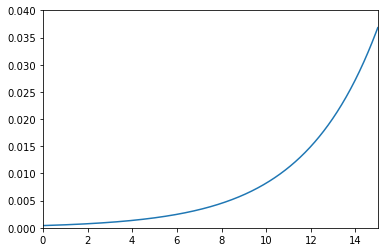

In [16]:
r_vO2=rae[:,6]*Cae[:,1]
print(rae[:,6])
print(Cae[:,1])
plt.plot(ts, r_vO2)
plt.axis([0,15,0,0.04])
plt.show()

The organism will begin to grow slower until it reaches the point of maintainence

l) Perform your own flux model (set up your own response function). Include $CO_2$ as seperate flux. Check against the supplied model. Note the following stoichiometric relationship: $r_6=2r_3$ ($C_4$ joining $C_2$ to form $C_6$). Use the standard elemental composition for biomass. 

m) If the PEP carboxykinase gene is removed and replaced with the more conventional pyruvate carboxylase, the ATP balance of the organism will be affected. Note that a mole of ATP is required to convert pyruvate to oxaloacetate via pyruvate carboxylase. Determine how the biomass yield on glucose will be affected when the modification is performed (assume zero inhibition). How will this modification affect the anaerobic fermentation? How will the modification affect the aerobic-anaerobic combo fermentation?[$\frac{Y_{SX}^{xylase}}{Y_{SX}^{kinase}}=0.28$]